# Consumer Finance Report

Each week the CFPB sends thousands of consumers’ complaints about financial products and services to companies for response. Those complaints are published here after the company responds or after 15 days, whichever comes first. By adding their voice, consumers help improve the financial marketplace.
https://www.kaggle.com/cfpb/us-consumer-finance-complaints

Import libraries and call data.

In [1]:
import pandas as pd
import numpy as np
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display, HTML, Markdown, display

#constants 
def printmd(string):
    display(Markdown(string))
alphaLev = .5

In [4]:
CFPB = pd.read_csv('consumer_complaints.csv')

C:\Users\Leslie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
CFPB.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [18]:
CFPB.shape

(1483, 18)

In [5]:
CFPB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
consumer_dis

# Data Analysis

Provide summation of null values.

In [5]:
CFPB.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

_Figure 1: Missing Data Indicated in Yellow._

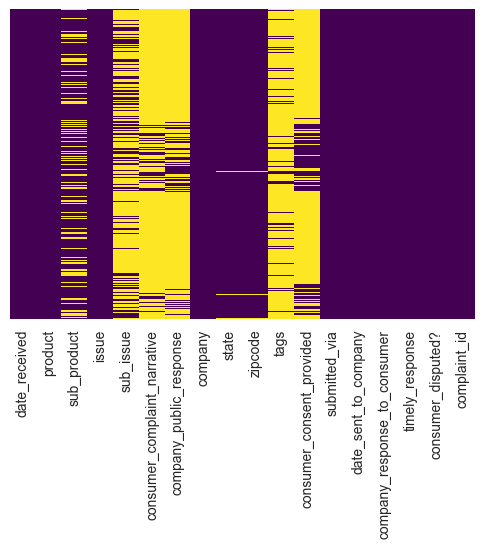

In [6]:
sns.heatmap(CFPB.isnull(), yticklabels=False, cbar=False, cmap='viridis')
printmd("_Figure 1: Missing Data Indicated in Yellow._")

Provide list of distributed product type.

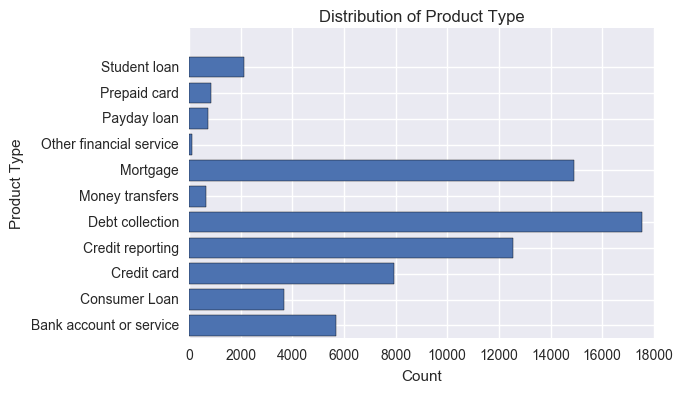

_Figure 2: Distribution of product types._

The number of grievances of the product type 'Other financial service' is $110$.

In [7]:
CustomerComplaint = CFPB[CFPB['consumer_complaint_narrative'].notnull()]
productCount = CustomerComplaint.groupby('product')['consumer_complaint_narrative'].count()

locus = np.arange(productCount.shape[0])+.5    

plt.barh(locus,productCount, align='center')
plt.yticks(locus,productCount.index)
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Distribution of Product Type')
plt.grid(True)
plt.show()
printmd("_Figure 2: Distribution of product types._")
printmd("The number of grievances of the product type 'Other financial service' is $" + str(
       productCount["Other financial service"]) + "$.")

In [8]:
CFPB['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

In [9]:
CFPB['company'].nunique()

3605

In [10]:
CFPB.keys()

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

# Data Cleaning

In [22]:
CFPB.dropna(inplace=True)

In [23]:
CFPB.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
191335,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt resulted from identity theft,In XX/XX/XXXX I filed a police report regardin...,Company believes it acted appropriately as aut...,"Meade & Associates, Inc.",KY,400XX,Servicemember,Consent provided,Web,03/19/2015,Closed,Yes,No,1290282
191417,03/26/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I received services from a healthcare provider...,Company chooses not to provide a public response,"CMRE Financial Services, Inc.",CA,906XX,Servicemember,Consent provided,Web,03/26/2015,Closed with explanation,Yes,No,1302072
191636,03/19/2015,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,"I have reached out to the company. However, th...",Company chooses not to provide a public response,"SunTrust Banks, Inc.",MD,207XX,Servicemember,Consent provided,Web,04/03/2015,Closed with explanation,Yes,Yes,1292216
191858,03/19/2015,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,"Reached out to them however, never got a respo...",Company believes it acted appropriately as aut...,FC HoldCo LLC,MD,207XX,Servicemember,Consent provided,Web,03/31/2015,Closed with explanation,Yes,Yes,1292219
192023,03/19/2015,Debt collection,Credit card,Improper contact or sharing of info,Contacted me instead of my attorney,After retaining counsel in XXXX of XXXX due to...,Company chooses not to provide a public response,"Javitch, Block & Rathbone LLC",OH,442XX,Older American,Consent provided,Web,03/30/2015,Closed with explanation,Yes,No,1292201


In [21]:
CFPB.shape

(1483, 18)

Number of distinct companies?

In [22]:
CFPB['company'].nunique()

443

_Figure 2: Data rid of null values._

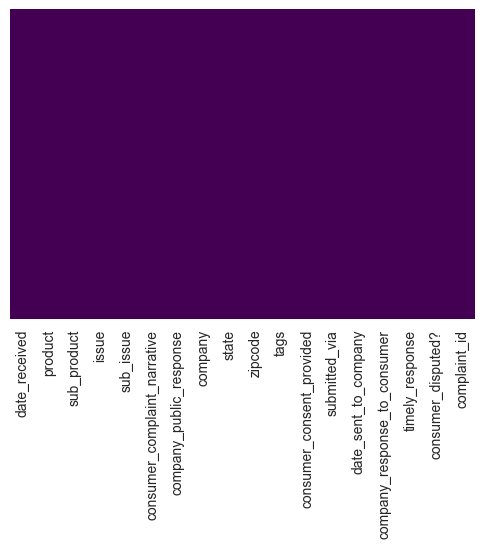

In [23]:
sns.heatmap(CFPB.isnull(), yticklabels=False, cbar=False, cmap='viridis')
printmd("_Figure 2: Data rid of null values._")

In [24]:
CFPB.info()
#https://www.kaggle.com/mmrosenb/d/cfpb/us-consumer-finance-complaints/language-analysis
#https://www.kaggle.com/mmrosenb/d/cfpb/us-consumer-finance-complaints/eda-on-consumer-complaints

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 191335 to 553022
Data columns (total 18 columns):
date_received                   1483 non-null object
product                         1483 non-null object
sub_product                     1483 non-null object
issue                           1483 non-null object
sub_issue                       1483 non-null object
consumer_complaint_narrative    1483 non-null object
company_public_response         1483 non-null object
company                         1483 non-null object
state                           1483 non-null object
zipcode                         1483 non-null object
tags                            1483 non-null object
consumer_consent_provided       1483 non-null object
submitted_via                   1483 non-null object
date_sent_to_company            1483 non-null object
company_response_to_consumer    1483 non-null object
timely_response                 1483 non-null object
consumer_disputed?              1483 n

# Analysis Post Data Cleaning

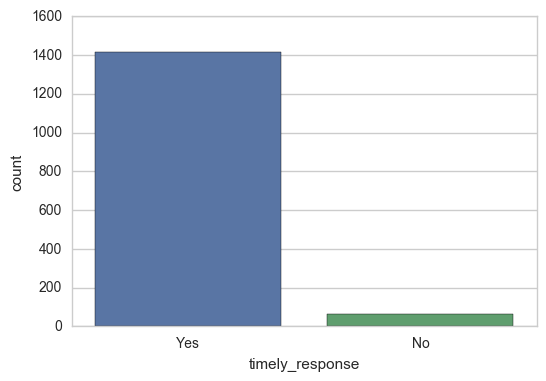

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='timely_response',data=CFPB)

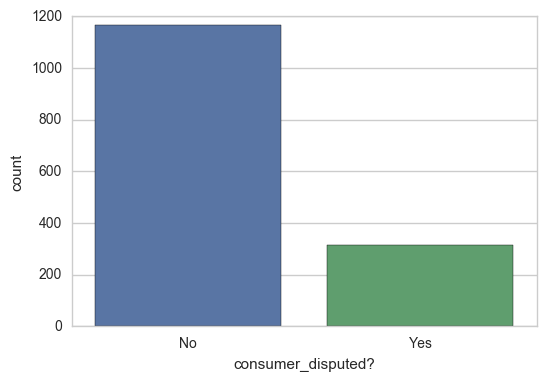

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='consumer_disputed?', data=CFPB)

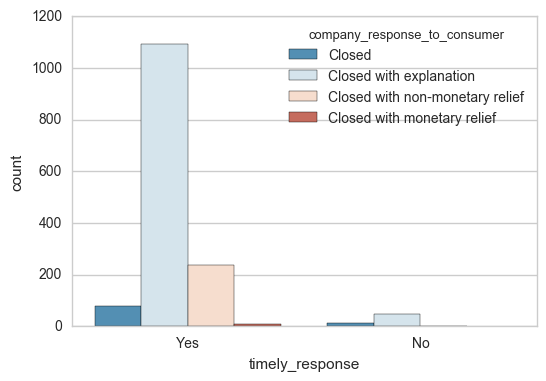

In [27]:
#plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x='timely_response',hue='company_response_to_consumer',data=CFPB,palette='RdBu_r')

plt.figure(figsize=(11,9))

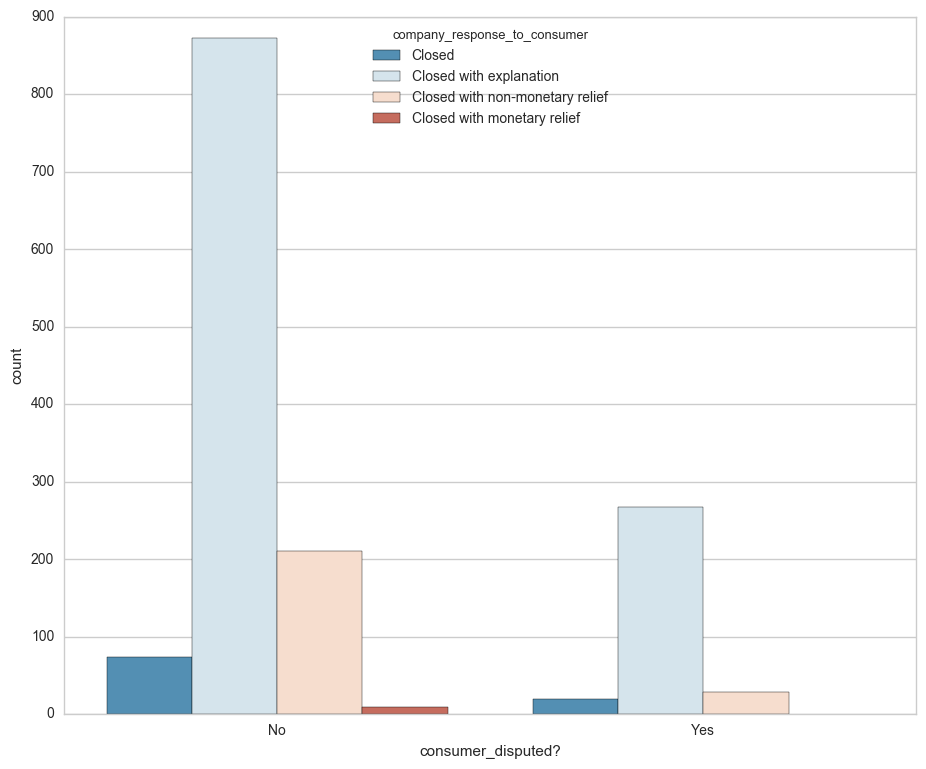

In [28]:
plt.figure(figsize=(11,9))
sns.set_style('whitegrid')
sns.countplot(x='consumer_disputed?',hue='company_response_to_consumer',data=CFPB,palette='RdBu_r')

Provide list of distributed product type after deletion of null values.

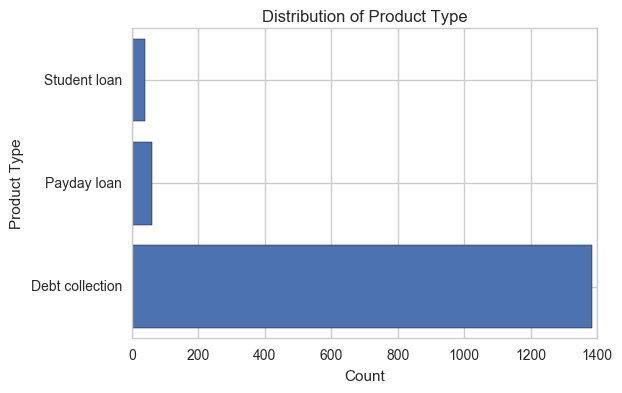

_Figure 3: Distribution of product types._

In [29]:
CustomerComplaint = CFPB[CFPB['consumer_complaint_narrative'].notnull()]
productCount = CustomerComplaint.groupby('product')['consumer_complaint_narrative'].count()

location = np.arange(productCount.shape[0])+.5    

plt.barh(location,productCount,align='center')
plt.yticks(location,productCount.index)
plt.xlabel('Count')
plt.ylabel("Product Type")
plt.title('Distribution of Product Type')
plt.grid(True)
plt.show()
printmd("_Figure 3: Distribution of product types._")

In [30]:
CFPB['product'].value_counts()

Debt collection    1385
Payday loan          59
Student loan         39
Name: product, dtype: int64

In [24]:
messages = [line.rstrip() for line in open('consumer_complaints.csv')]
print(len(messages))

715438


In [30]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')
#is this a good example of a text file

0 date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id


1 08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",,,,U.S. Bancorp,CA,95993,,,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074


2 08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",,,,Wells Fargo & Company,CA,91104,,,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080


3 08/30/2013,Credit reporting,,Incorrect information on credit report,Account status,,,Wells Fargo & Company,NY,11764,,,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473


4 08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,,,"Navient Solutions, Inc.",MD,21402,,,Email,08/30/2013,Closed with explanation,Yes,Yes,510326


5 08/30/2013,D